<a href="https://colab.research.google.com/github/PRAN20/Image-Classifier/blob/main/ImageClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Classifier**

**Importing Header**

In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

**Importing DataSets**

In [1]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
x_train.shape

(60000, 28, 28)

**Checking Any Element**

7


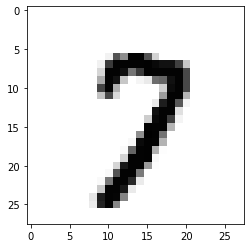

In [4]:
image_index = 353 
print(y_train[image_index]) 
plt.imshow(x_train[image_index], cmap='Greys') 

**Reshaping And Processing**

In [5]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


**Training Model**

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential() 
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape)) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Flatten()) 
model.add(Dense(64, activation=tf.nn.relu)) 
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax)) 

**Fitting Our Model**

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0952 - accuracy: 0.9708
Epoch 2/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0713 - accuracy: 0.9770
Epoch 3/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0582 - accuracy: 0.9815
Epoch 4/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0492 - accuracy: 0.9839
Epoch 5/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0427 - accuracy: 0.9862
Epoch 6/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0391 - accuracy: 0.9870
Epoch 7/20
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0343 - accuracy: 0.9886
Epoch 8/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0313 - accuracy: 0.9893
Epoch 9/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0283 - accuracy: 0.9902
Epoch 10/20
1875/1875 [==============================] - 28s 15m

In [9]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0848 - accuracy: 0.9823


[0.08482208102941513, 0.9822999835014343]

**Testing on TestSet**

6


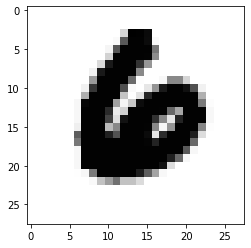

In [10]:
image_index = 353 
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())


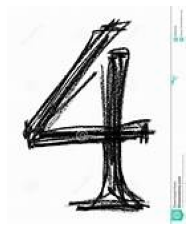

In [19]:
im = cv2.imread("four.jpg")
plt.imshow(im, cmap="gray"), plt.axis("off")
plt.show()

In [20]:
im.shape

(164, 135, 3)

**Load Image**

In [21]:
from tensorflow.keras.preprocessing import image 
img = image.load_img("four.jpg", target_size=(28, 28),color_mode="grayscale")

In [22]:
img_array = image.img_to_array(img)

In [23]:
img_array.shape

(28, 28, 1)

In [24]:
img_array = img_array[:,:,0]
img_array.shape

(28, 28)

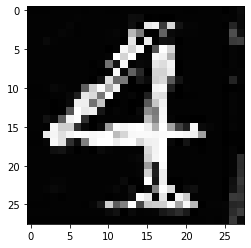

In [25]:
plt.imshow(img_array,cmap="Greys")

**Convert Image Into Array**

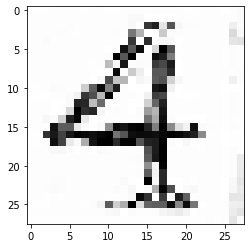

In [26]:
img_array=1-img_array
plt.imshow(img_array,cmap="Greys")

**Running Prediction On Image**

4


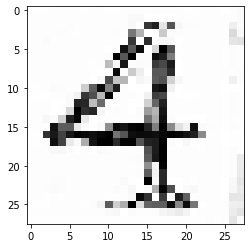

In [27]:
plt.imshow(img_array,cmap="Greys")
pred = model.predict(img_array.reshape(1, 28, 28, 1))
print(pred.argmax())